In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Wavelength to RGB

In [3]:
def wavelength_to_rgb(wavelength, gamma=0.8):

    '''This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    R *= 255
    G *= 255
    B *= 255
    return (int(R), int(G), int(B))

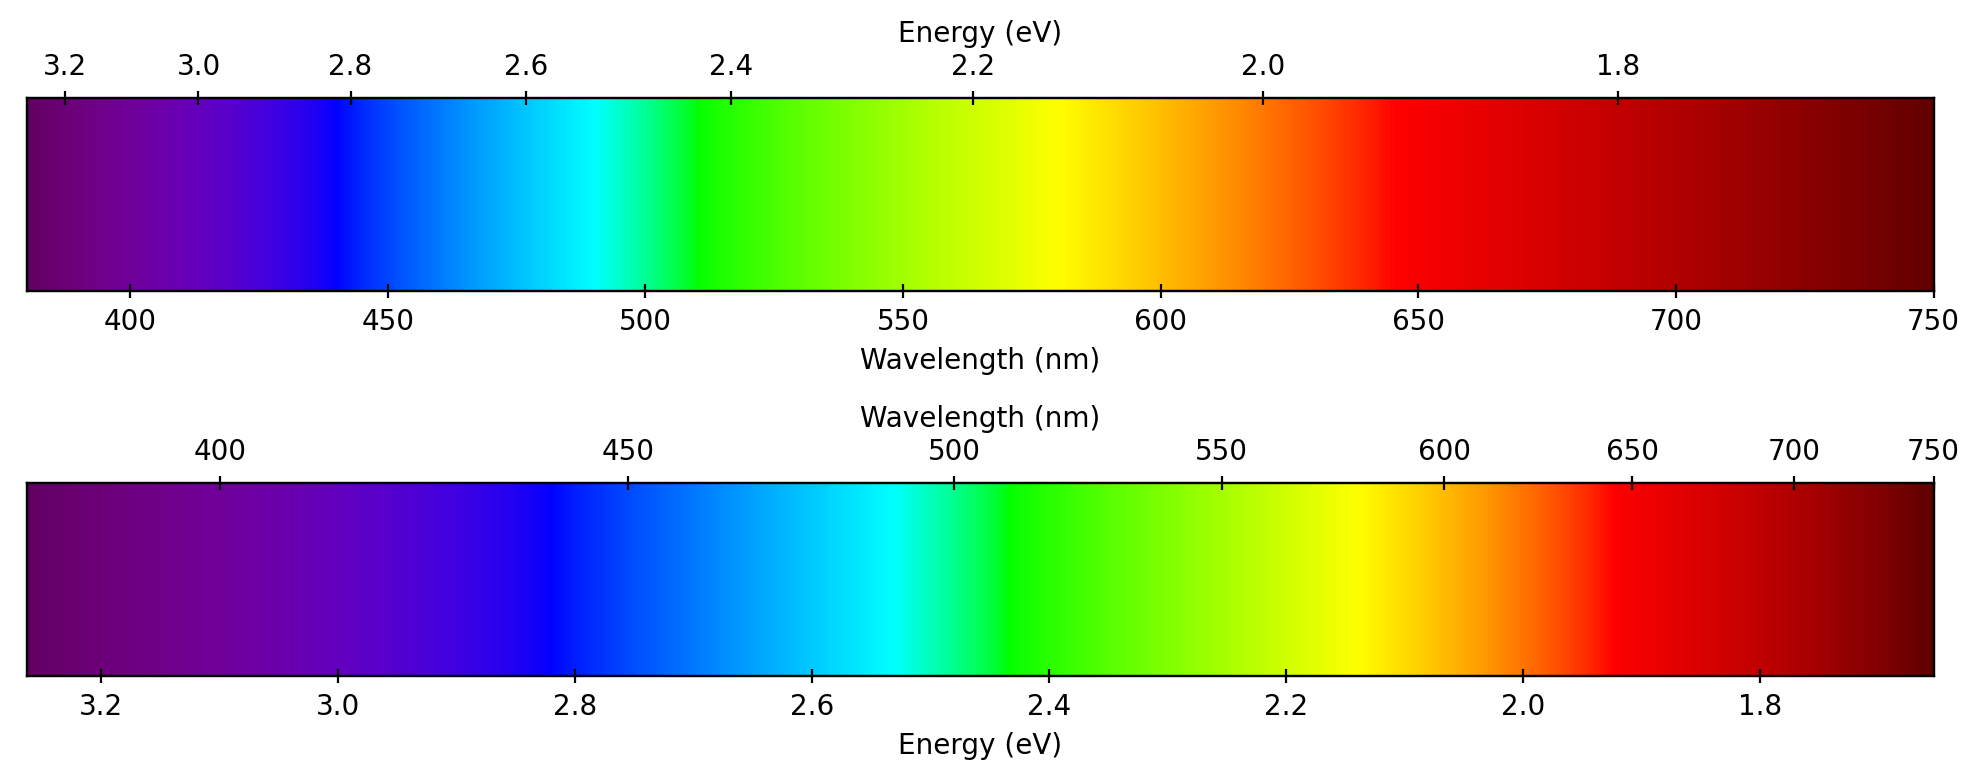

In [64]:
N = 500
hc = 6.62607004e-34 * 299792458 / 1.602176634e-19 * 1e9 # eV * nm

fig = plt.figure(figsize=(10, 4), dpi=200)

fig.add_subplot(211)
wavelengths = np.linspace(380, 750, N)
energies = np.arange(1.8, 3.4, 0.2)
interval = wavelengths[1] - wavelengths[0]
ax = plt.gca()
for i in range(N):
    color = np.array(wavelength_to_rgb(wavelengths[i])) / 255
    s = Rectangle((wavelengths[i], 0), interval, 1, color=color, linewidth=None)
    ax.add_patch(s)
plt.xlim(380, 750)
plt.xlabel("Wavelength (nm)")
plt.yticks([])
ax.tick_params(direction='inout', length=5)
ax2 = ax.twiny()
ax2.set_xlabel("Energy (eV)")
ax2.set_xlim(380, 750)
ax2.tick_params(direction='inout', length=5)
ax2.set_xticks(hc/energies)
ax2.set_xticklabels([f"{E:.1f}" for E in energies])

fig.add_subplot(212)
energies = np.linspace(3.262742, 1.653123, N)
wavelengths = np.arange(400, 760, 50)

interval = energies[1] - energies[0]
ax = plt.gca()
for i in range(N):
    color = np.array(wavelength_to_rgb(hc/energies[i])) / 255
    s = Rectangle((energies[i], 0), -interval, 1, color=color, linewidth=None)
    ax.add_patch(s)
plt.xlim(3.262742, 1.653123)
plt.xlabel("Energy (eV)")
plt.yticks([])
ax.tick_params(direction='inout', length=5)
ax2 = ax.twiny()
ax2.set_xlabel("Wavelength (nm)")
ax2.set_xlim(3.262742, 1.653123)
ax2.tick_params(direction='inout', length=5)
ax2.set_xticks(hc/wavelengths)
ax2.set_xticklabels([f"{l:.0f}" for l in wavelengths])

plt.tight_layout()
plt.savefig("wavelength_energy.png")
plt.show()

In [29]:
hc/750

1.6531226183323624

In [74]:
Li_spectrum = np.array([4131.624, 4132.625, 4602.831, 4602.898, 4602.902,
                        4971.665, 4971.748, 6103.542, 6103.654, 6103.667,
                        6707.775, 6707.926])

Li_ion_spectrum = np.array([4155.946, 4325.419, 4325.471, 4671.651, 4671.705,
                            4678.056, 4678.290, 4788.363, 4881.320, 4881.386,
                            4881.490, 5037.915, 5483.560, 5484.500, 5485.110])

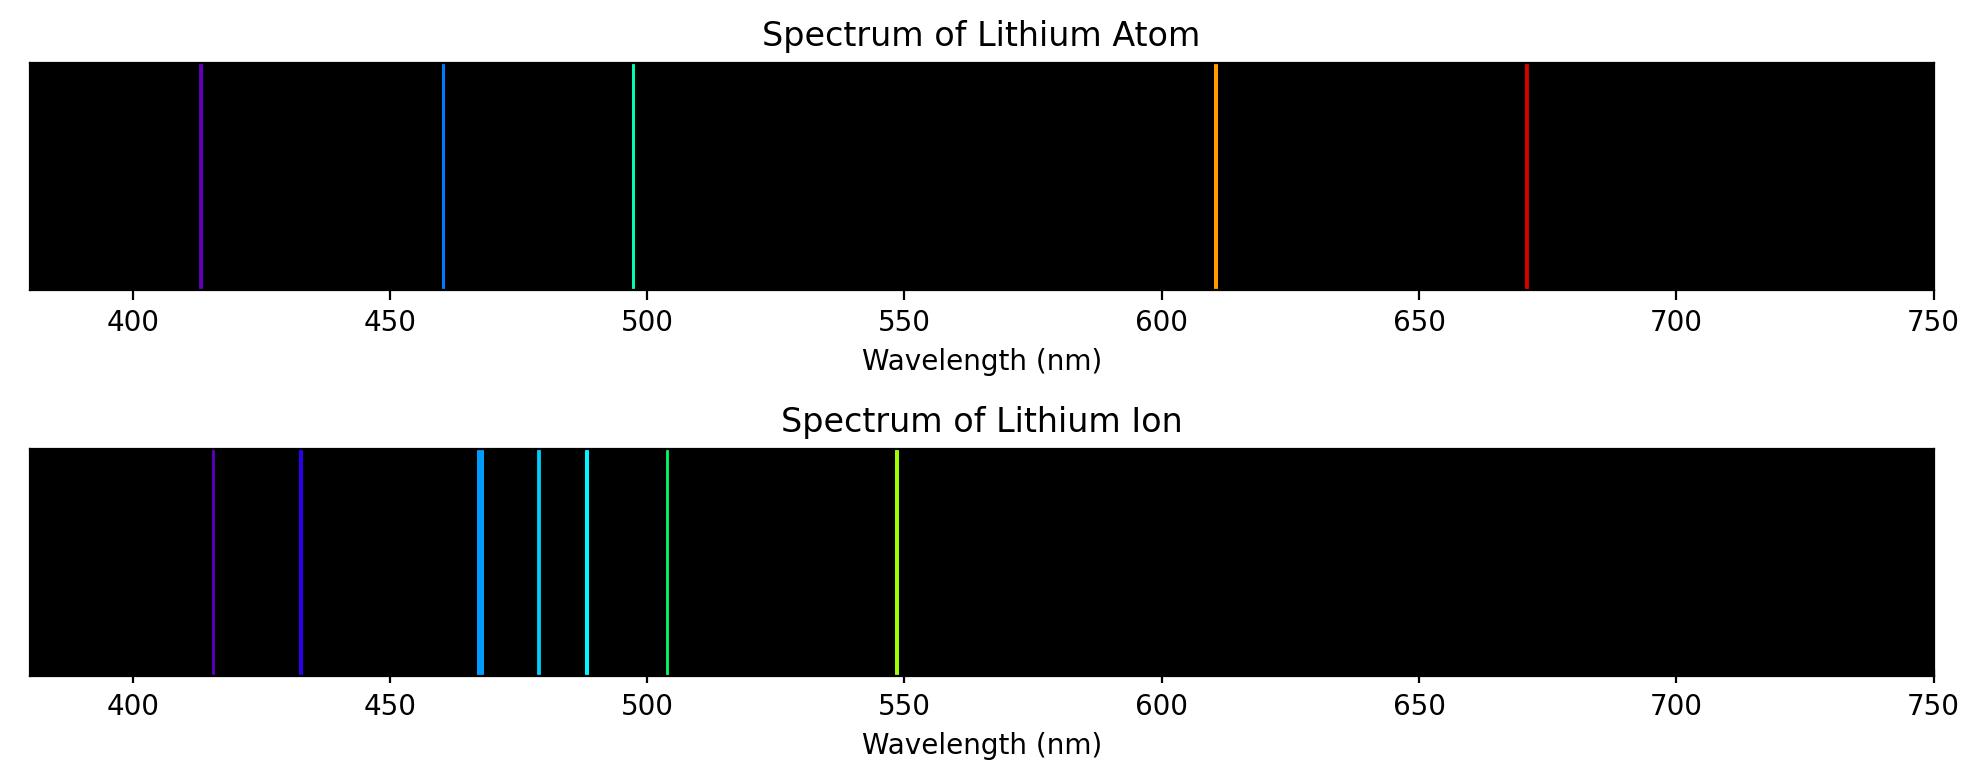

In [83]:
hc = 6.62607004e-34 * 299792458 / 1.602176634e-19 * 1e9 # eV * nm

fig = plt.figure(figsize=(10, 4), dpi=200)

fig.add_subplot(211)
wavelengths = Li_spectrum / 10
energies = np.arange(1.8, 3.4, 0.2)
interval = 0.1
ax = plt.gca()
s = Rectangle((380, 0), 370, 1, color='k', linewidth=None)
ax.add_patch(s)
for i in range(len(wavelengths)):
    color = np.array(wavelength_to_rgb(wavelengths[i])) / 255
    s = Rectangle((wavelengths[i], 0), interval, 1, color=color, linewidth=None)
    ax.add_patch(s)
plt.xlim(380, 750)
plt.xlabel("Wavelength (nm)")
plt.yticks([])
# ax.tick_params(direction='inout', length=5)
# ax2 = ax.twiny()
# ax2.set_xlabel("Energy (eV)")
# ax2.set_xlim(380, 750)
# ax2.tick_params(direction='inout', length=5)
# ax2.set_xticks(hc/energies)
# ax2.set_xticklabels([f"{E:.1f}" for E in energies])
plt.title("Spectrum of Lithium Atom")

fig.add_subplot(212)
wavelengths = Li_ion_spectrum / 10
energies = np.arange(1.8, 3.4, 0.2)
interval = 0.1
ax = plt.gca()
s = Rectangle((380, 0), 370, 1, color='k', linewidth=None)
ax.add_patch(s)
for i in range(len(wavelengths)):
    color = np.array(wavelength_to_rgb(wavelengths[i])) / 255
    s = Rectangle((wavelengths[i], 0), interval, 1, color=color, linewidth=None)
    ax.add_patch(s)
plt.xlim(380, 750)
plt.xlabel("Wavelength (nm)")
plt.yticks([])
ax.tick_params(direction='inout', length=5)
# ax2 = ax.twiny()
# ax2.set_xlabel("Energy (eV)")
# ax2.set_xlim(380, 750)
# ax2.tick_params(direction='inout', length=5)
# ax2.set_xticks(hc/energies)
# ax2.set_xticklabels([f"{E:.1f}" for E in energies])
plt.title("Spectrum of Lithium Ion")

plt.tight_layout()
plt.savefig("Lithium_spectrum.png")
plt.show()

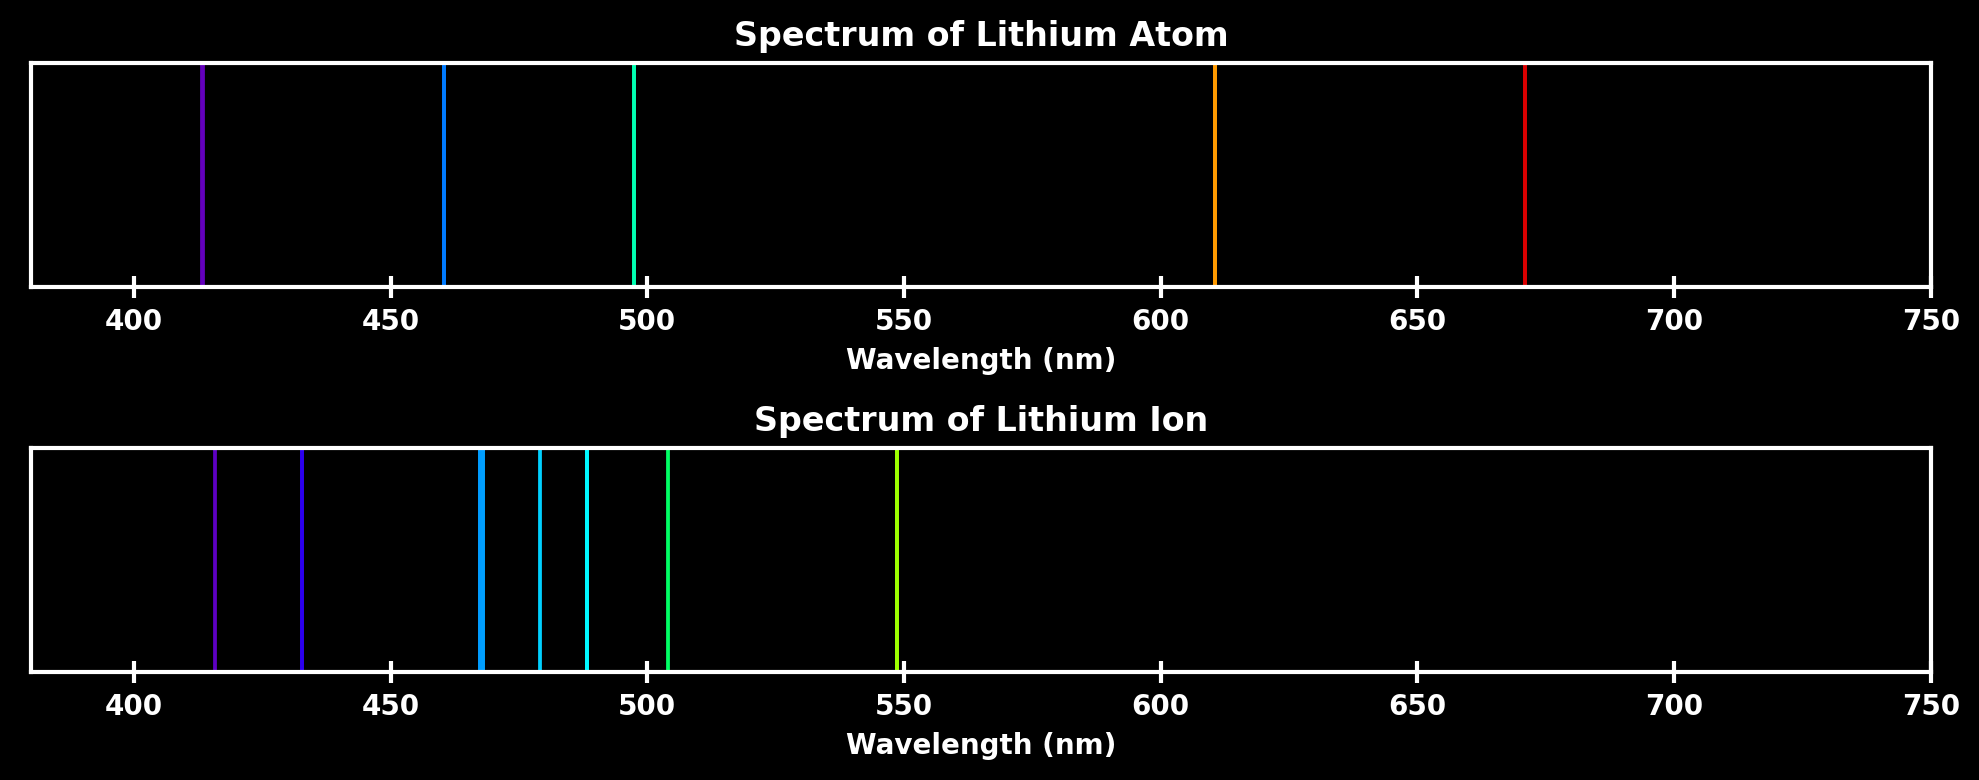

In [102]:
plt.style.use('dark_background')

hc = 6.62607004e-34 * 299792458 / 1.602176634e-19 * 1e9 # eV * nm

fig = plt.figure(figsize=(10, 4), dpi=200)

fig.add_subplot(211)
wavelengths = Li_spectrum / 10
energies = np.arange(1.8, 3.4, 0.2)
interval = 0.2
ax = plt.gca()
s = Rectangle((380, 0), 370, 1, color='k', linewidth=None)
ax.add_patch(s)
for i in range(len(wavelengths)):
    color = np.array(wavelength_to_rgb(wavelengths[i])) / 255
    s = Rectangle((wavelengths[i], 0), interval, 1, color=color, linewidth=None)
    ax.add_patch(s)
plt.xlim(380, 750)
plt.xlabel("Wavelength (nm)", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks([])
ax.tick_params(direction='inout', length=8, width=1.5)
[x.set_linewidth(1.5) for x in ax.spines.values()]
# ax2 = ax.twiny()
# ax2.set_xlabel("Energy (eV)")
# ax2.set_xlim(380, 750)
# ax2.tick_params(direction='inout', length=5)
# ax2.set_xticks(hc/energies)
# ax2.set_xticklabels([f"{E:.1f}" for E in energies])
plt.title("Spectrum of Lithium Atom", fontweight='bold')

fig.add_subplot(212)
wavelengths = Li_ion_spectrum / 10
energies = np.arange(1.8, 3.4, 0.2)
interval = 0.2
ax = plt.gca()
s = Rectangle((380, 0), 370, 1, color='k', linewidth=None)
ax.add_patch(s)
for i in range(len(wavelengths)):
    color = np.array(wavelength_to_rgb(wavelengths[i])) / 255
    s = Rectangle((wavelengths[i], 0), interval, 1, color=color, linewidth=None)
    ax.add_patch(s)
plt.xlim(380, 750)
plt.xlabel("Wavelength (nm)", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks([])
ax.tick_params(direction='inout', length=8, width=1.5)
[x.set_linewidth(1.5) for x in ax.spines.values()]
# ax2 = ax.twiny()
# ax2.set_xlabel("Energy (eV)")
# ax2.set_xlim(380, 750)
# ax2.tick_params(direction='inout', length=5)
# ax2.set_xticks(hc/energies)
# ax2.set_xticklabels([f"{E:.1f}" for E in energies])
plt.title("Spectrum of Lithium Ion", fontweight='bold')

plt.tight_layout()
plt.savefig("Lithium_spectrum_dark_bold.png")
plt.show()

In [ ]:
3829.355	Mg I	KM91a
   50 P	 3832.300	Mg I	KM91a
   80 P	 3838.292

In [104]:
Mg_spectrum = np.array([3829.355, 3832.300, 3838.292, 4167.271, 4351.906,
                        4571.096, 5167.322, 5172.684, 5183.604, 5711.088,
                        7387.685])

Mg_ion_spectrum = np.array([4390.572, 4481.126, 4481.325, 6346.742, 6545.973])

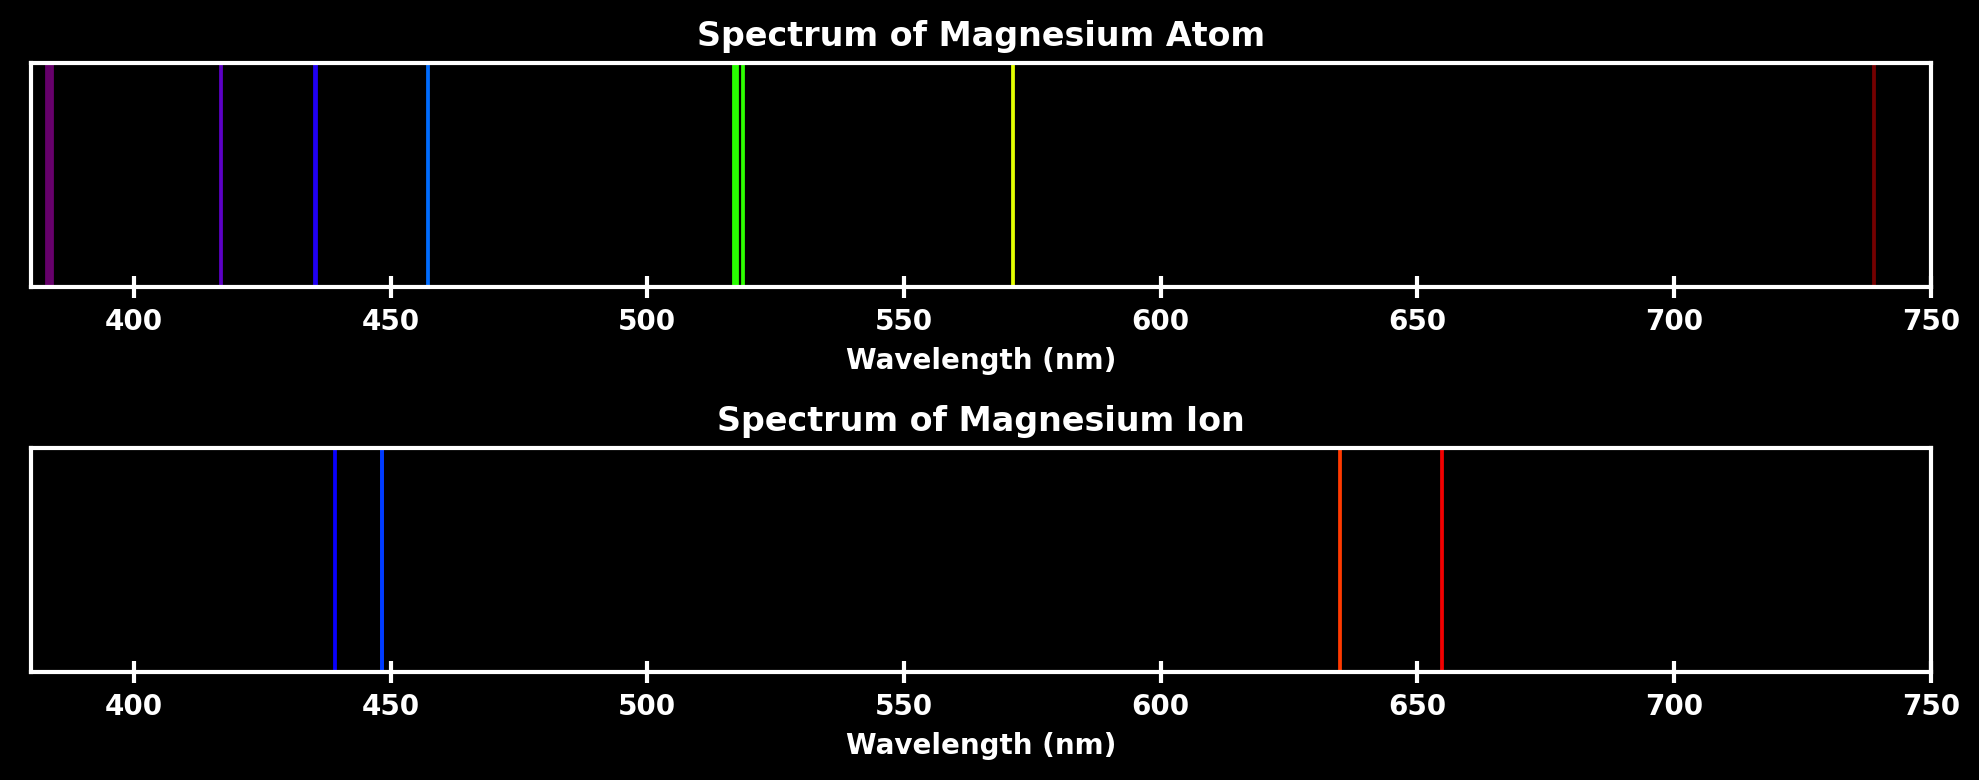

In [107]:
plt.style.use('dark_background')

hc = 6.62607004e-34 * 299792458 / 1.602176634e-19 * 1e9 # eV * nm

fig = plt.figure(figsize=(10, 4), dpi=200)

fig.add_subplot(211)
wavelengths = Mg_spectrum / 10
energies = np.arange(1.8, 3.4, 0.2)
interval = 0.2
ax = plt.gca()
s = Rectangle((380, 0), 370, 1, color='k', linewidth=None)
ax.add_patch(s)
for i in range(len(wavelengths)):
    color = np.array(wavelength_to_rgb(wavelengths[i])) / 255
    s = Rectangle((wavelengths[i], 0), interval, 1, color=color, linewidth=None)
    ax.add_patch(s)
plt.xlim(380, 750)
plt.xlabel("Wavelength (nm)", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks([])
ax.tick_params(direction='inout', length=8, width=1.5)
[x.set_linewidth(1.5) for x in ax.spines.values()]
# ax2 = ax.twiny()
# ax2.set_xlabel("Energy (eV)")
# ax2.set_xlim(380, 750)
# ax2.tick_params(direction='inout', length=5)
# ax2.set_xticks(hc/energies)
# ax2.set_xticklabels([f"{E:.1f}" for E in energies])
plt.title("Spectrum of Magnesium Atom", fontweight='bold')

fig.add_subplot(212)
wavelengths = Mg_ion_spectrum / 10
energies = np.arange(1.8, 3.4, 0.2)
interval = 0.2
ax = plt.gca()
s = Rectangle((380, 0), 370, 1, color='k', linewidth=None)
ax.add_patch(s)
for i in range(len(wavelengths)):
    color = np.array(wavelength_to_rgb(wavelengths[i])) / 255
    s = Rectangle((wavelengths[i], 0), interval, 1, color=color, linewidth=None)
    ax.add_patch(s)
plt.xlim(380, 750)
plt.xlabel("Wavelength (nm)", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks([])
ax.tick_params(direction='inout', length=8, width=1.5)
[x.set_linewidth(1.5) for x in ax.spines.values()]
# ax2 = ax.twiny()
# ax2.set_xlabel("Energy (eV)")
# ax2.set_xlim(380, 750)
# ax2.tick_params(direction='inout', length=5)
# ax2.set_xticks(hc/energies)
# ax2.set_xticklabels([f"{E:.1f}" for E in energies])
plt.title("Spectrum of Magnesium Ion", fontweight='bold')

plt.tight_layout()
plt.savefig("Magnesium_spectrum_dark_bold.png")
plt.show()

In [108]:
Uranium_spectrum = np.array([3808.9207, 3811.9911, 3839.6255, 3854.2202, 3871.0353,
                             3894.1206, 3906.4530, 3926.2078, 3926.7153, 3943.8161,
                             3964.2064, 4005.2094, 4042.7496, 4047.6117, 4153.9710,
                             4156.6483, 4222.3677, 4355.7400, 4362.0510, 4393.5858,
                             4756.8059, 5027.3841, 5915.3850, 6826.9130])

Uranium_ion_spectrum = np.array([3826.5084, 3831.4593, 3854.6448, 3859.5716, 3865.9176,
                                 3874.0387, 3878.0847, 3881.4546, 3890.3615, 3892.6810,
                                 3899.7775, 3932.0221, 3966.5211, 3985.7924, 4017.7163,
                                 4050.0412, 4062.5440, 4090.1319, 4116.0974, 4171.5886,
                                 4241.6646, 4341.6865, 4472.3297, 4543.6255])

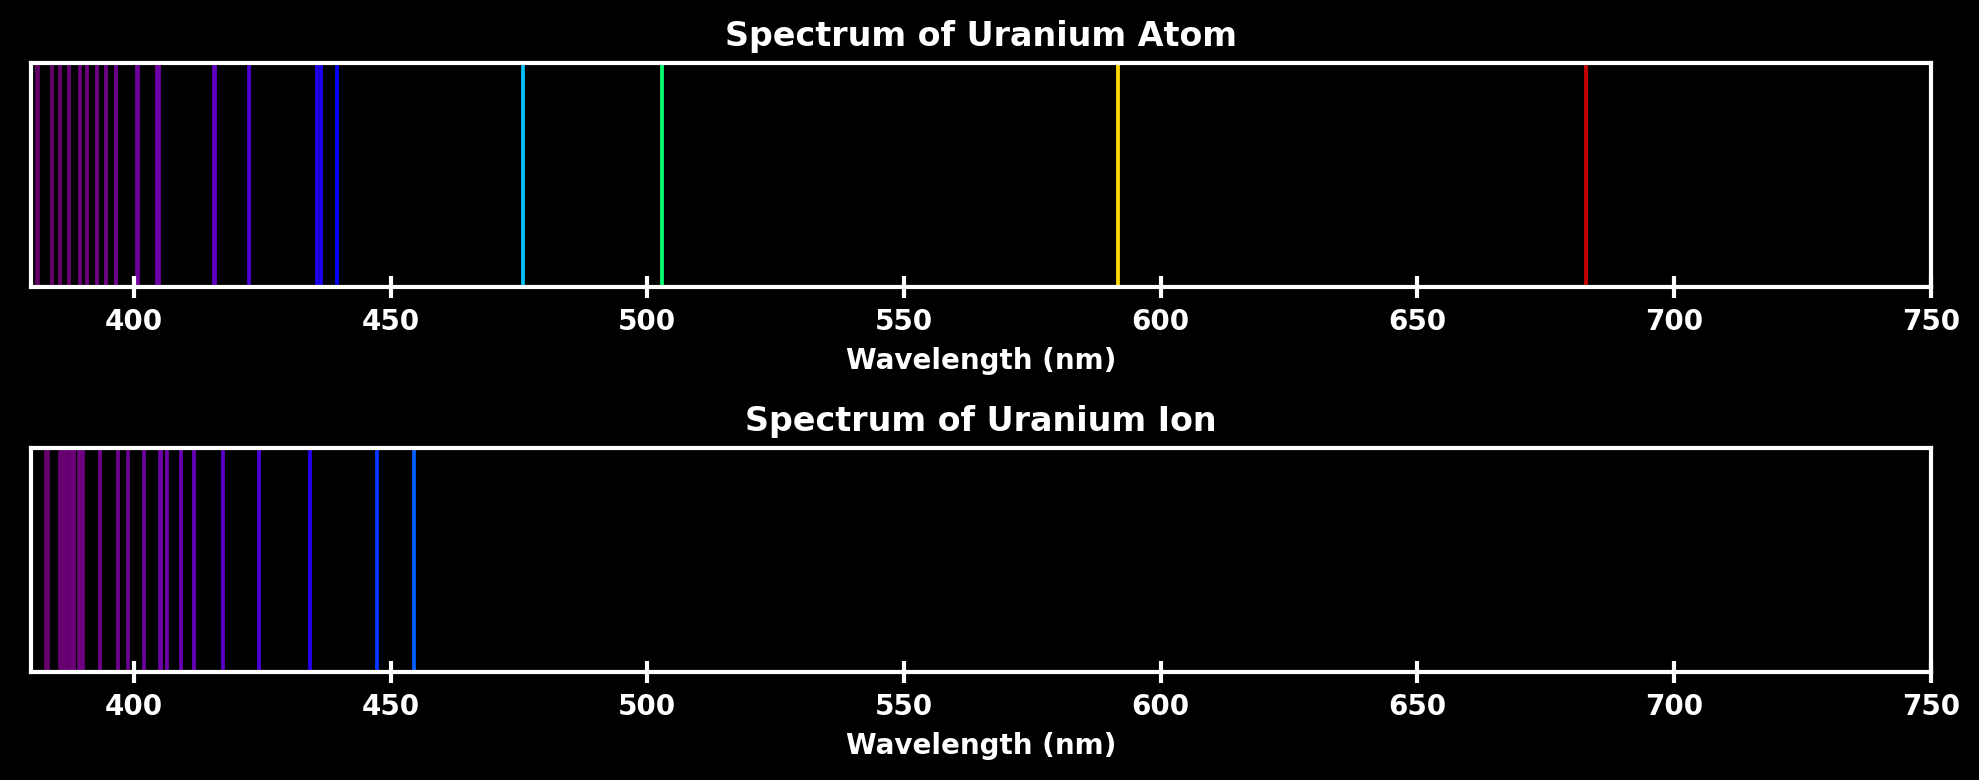

In [109]:
plt.style.use('dark_background')

hc = 6.62607004e-34 * 299792458 / 1.602176634e-19 * 1e9 # eV * nm

fig = plt.figure(figsize=(10, 4), dpi=200)

fig.add_subplot(211)
wavelengths = Uranium_spectrum / 10
energies = np.arange(1.8, 3.4, 0.2)
interval = 0.2
ax = plt.gca()
s = Rectangle((380, 0), 370, 1, color='k', linewidth=None)
ax.add_patch(s)
for i in range(len(wavelengths)):
    color = np.array(wavelength_to_rgb(wavelengths[i])) / 255
    s = Rectangle((wavelengths[i], 0), interval, 1, color=color, linewidth=None)
    ax.add_patch(s)
plt.xlim(380, 750)
plt.xlabel("Wavelength (nm)", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks([])
ax.tick_params(direction='inout', length=8, width=1.5)
[x.set_linewidth(1.5) for x in ax.spines.values()]
# ax2 = ax.twiny()
# ax2.set_xlabel("Energy (eV)")
# ax2.set_xlim(380, 750)
# ax2.tick_params(direction='inout', length=5)
# ax2.set_xticks(hc/energies)
# ax2.set_xticklabels([f"{E:.1f}" for E in energies])
plt.title("Spectrum of Uranium Atom", fontweight='bold')

fig.add_subplot(212)
wavelengths = Uranium_ion_spectrum / 10
energies = np.arange(1.8, 3.4, 0.2)
interval = 0.2
ax = plt.gca()
s = Rectangle((380, 0), 370, 1, color='k', linewidth=None)
ax.add_patch(s)
for i in range(len(wavelengths)):
    color = np.array(wavelength_to_rgb(wavelengths[i])) / 255
    s = Rectangle((wavelengths[i], 0), interval, 1, color=color, linewidth=None)
    ax.add_patch(s)
plt.xlim(380, 750)
plt.xlabel("Wavelength (nm)", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks([])
ax.tick_params(direction='inout', length=8, width=1.5)
[x.set_linewidth(1.5) for x in ax.spines.values()]
# ax2 = ax.twiny()
# ax2.set_xlabel("Energy (eV)")
# ax2.set_xlim(380, 750)
# ax2.tick_params(direction='inout', length=5)
# ax2.set_xticks(hc/energies)
# ax2.set_xticklabels([f"{E:.1f}" for E in energies])
plt.title("Spectrum of Uranium Ion", fontweight='bold')

plt.tight_layout()
plt.savefig("Uranium_spectrum_dark_bold.png")
plt.show()

In [110]:
import pandas as pd

In [121]:
pd.read_csv("./Europium_spectrum.txt", sep='\s\s\s\s', names=list(range(7)))

,0,1,2,3,4,5,6
0,11,NaN,NaN,3811.33,NaN,Eu I,MCS75
1,600,"P,c,w",3819.67,NaN,Eu II,MCS75,None
2,15,NaN,NaN,3865.57,NaN,Eu I,MCS75
3,14,NaN,NaN,3884.75,NaN,Eu I,MCS75
4,500,"P,c,w",3907.10,NaN,Eu II,MCS75,None
...,...,...,...,...,...,...,...
89,10,NaN,NaN,7194.81,NaN,Eu II,MCS75
90,10,NaN,NaN,7217.55,NaN,Eu II,MCS75
91,9,NaN,NaN,7301.17,NaN,Eu II,MCS75
92,12,NaN,NaN,7370.22,NaN,Eu II,MCS75


In [122]:
with open("./Europium_spectrum.txt") as f:
    lines = f.readlines()

In [130]:
wavelengths = np.array([float(line[17:30]) for line in lines])
name = np.array([line[36:41] for line in lines])

In [135]:
df_Europium = pd.DataFrame(data=np.transpose([wavelengths, name]), columns=['wavelengths', 'name'])

In [149]:
np.array(df_Europium[df_Europium['name'] == 'Eu I ']['wavelengths'], dtype=float)

array([3811.33, 3865.57, 3884.75, 3917.29, 4039.19, 4182.22, 4298.73,
       4594.03, 4627.22, 4661.88, 4867.62, 4907.18, 4911.4 , 5013.17,
       5022.91, 5029.54, 5114.37, 5129.1 , 5133.52, 5160.07, 5166.7 ,
       5199.85, 5200.96, 5206.44, 5215.1 , 5223.49, 5239.24, 5266.4 ,
       5271.96, 5272.48, 5282.82, 5291.26, 5294.64, 5357.61, 5361.61,
       5376.94, 5392.94, 5402.77, 5451.51, 5452.94, 5488.65, 5510.52,
       5547.44, 5570.33, 5577.14, 5580.03, 5645.8 , 5765.2 , 5783.69,
       5830.98, 5967.1 , 5972.75, 5992.83, 6012.56, 6018.15, 6029.  ,
       6057.36, 6083.84, 6099.35, 6118.78, 6178.76, 6188.13, 6195.07,
       6262.25, 6299.77, 6350.04, 6400.93, 6410.04, 6411.32, 6457.96,
       6802.72, 6864.54, 7040.2 ])

In [150]:
Europium_spectrum = np.array(df_Europium[df_Europium['name'] == 'Eu I ']['wavelengths'], dtype=float)
Europium_ion_spectrum = np.array(df_Europium[df_Europium['name'] == 'Eu II']['wavelengths'], dtype=float)

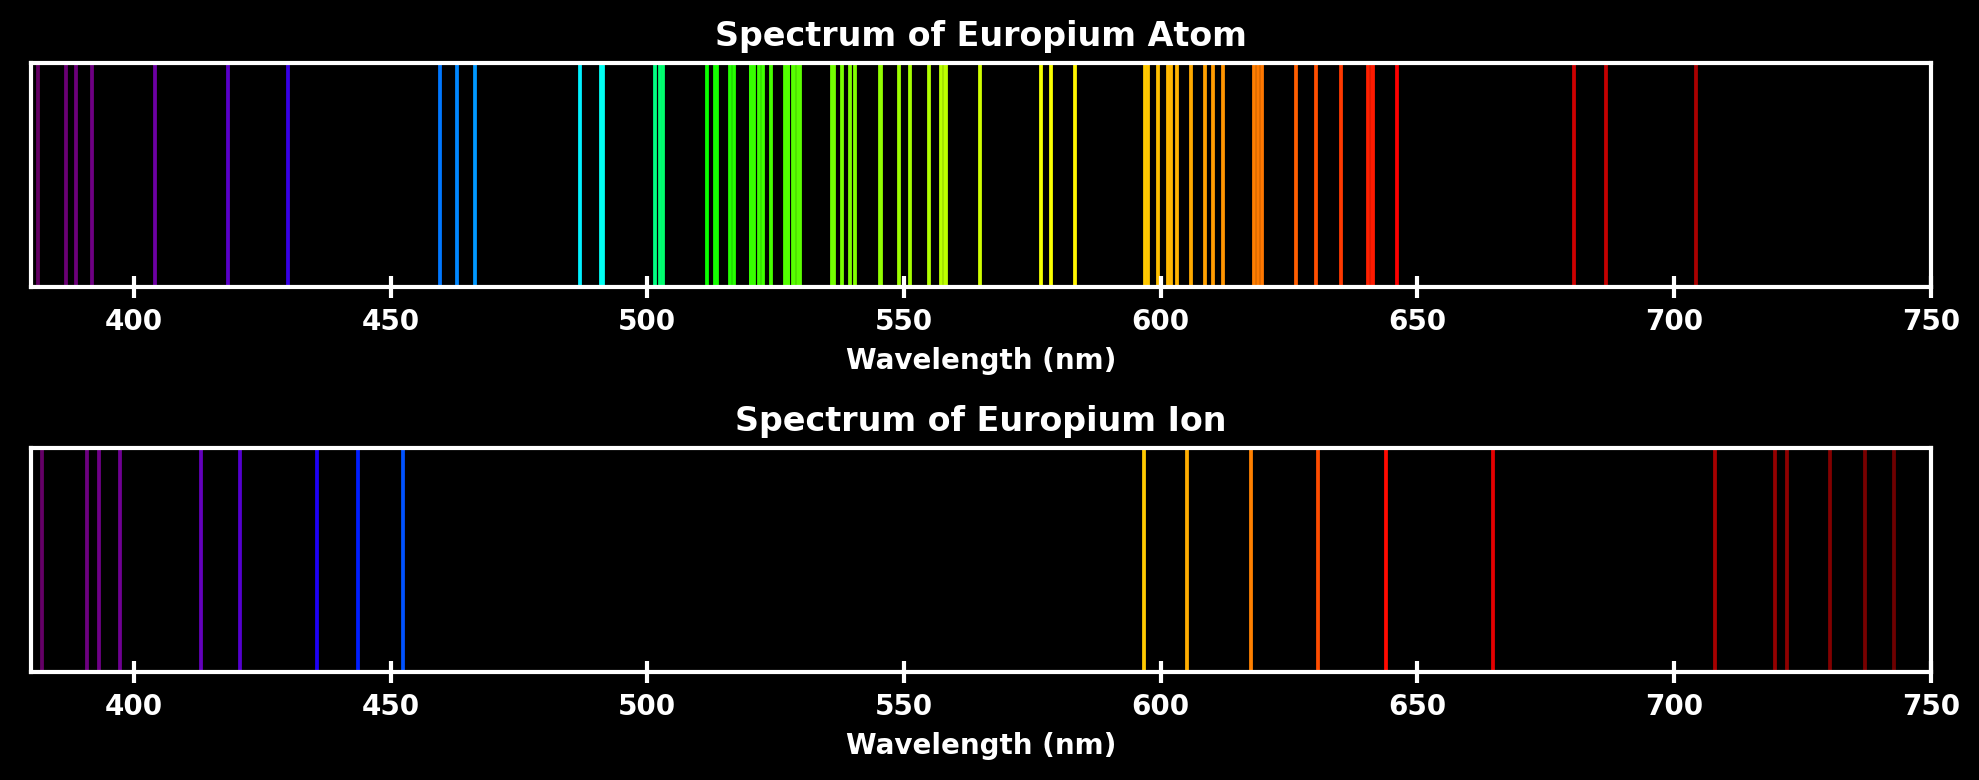

In [152]:
plt.style.use('dark_background')

hc = 6.62607004e-34 * 299792458 / 1.602176634e-19 * 1e9 # eV * nm

fig = plt.figure(figsize=(10, 4), dpi=200)

fig.add_subplot(211)
wavelengths = Europium_spectrum / 10
energies = np.arange(1.8, 3.4, 0.2)
interval = 0.2
ax = plt.gca()
s = Rectangle((380, 0), 370, 1, color='k', linewidth=None)
ax.add_patch(s)
for i in range(len(wavelengths)):
    color = np.array(wavelength_to_rgb(wavelengths[i])) / 255
    s = Rectangle((wavelengths[i], 0), interval, 1, color=color, linewidth=None)
    ax.add_patch(s)
plt.xlim(380, 750)
plt.xlabel("Wavelength (nm)", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks([])
ax.tick_params(direction='inout', length=8, width=1.5)
[x.set_linewidth(1.5) for x in ax.spines.values()]
# ax2 = ax.twiny()
# ax2.set_xlabel("Energy (eV)")
# ax2.set_xlim(380, 750)
# ax2.tick_params(direction='inout', length=5)
# ax2.set_xticks(hc/energies)
# ax2.set_xticklabels([f"{E:.1f}" for E in energies])
plt.title("Spectrum of Europium Atom", fontweight='bold')

fig.add_subplot(212)
wavelengths = Europium_ion_spectrum / 10
energies = np.arange(1.8, 3.4, 0.2)
interval = 0.2
ax = plt.gca()
s = Rectangle((380, 0), 370, 1, color='k', linewidth=None)
ax.add_patch(s)
for i in range(len(wavelengths)):
    color = np.array(wavelength_to_rgb(wavelengths[i])) / 255
    s = Rectangle((wavelengths[i], 0), interval, 1, color=color, linewidth=None)
    ax.add_patch(s)
plt.xlim(380, 750)
plt.xlabel("Wavelength (nm)", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks([])
ax.tick_params(direction='inout', length=8, width=1.5)
[x.set_linewidth(1.5) for x in ax.spines.values()]
# ax2 = ax.twiny()
# ax2.set_xlabel("Energy (eV)")
# ax2.set_xlim(380, 750)
# ax2.tick_params(direction='inout', length=5)
# ax2.set_xticks(hc/energies)
# ax2.set_xticklabels([f"{E:.1f}" for E in energies])
plt.title("Spectrum of Europium Ion", fontweight='bold')

plt.tight_layout()
plt.savefig("Europium_spectrum_dark_bold.png")
plt.show()

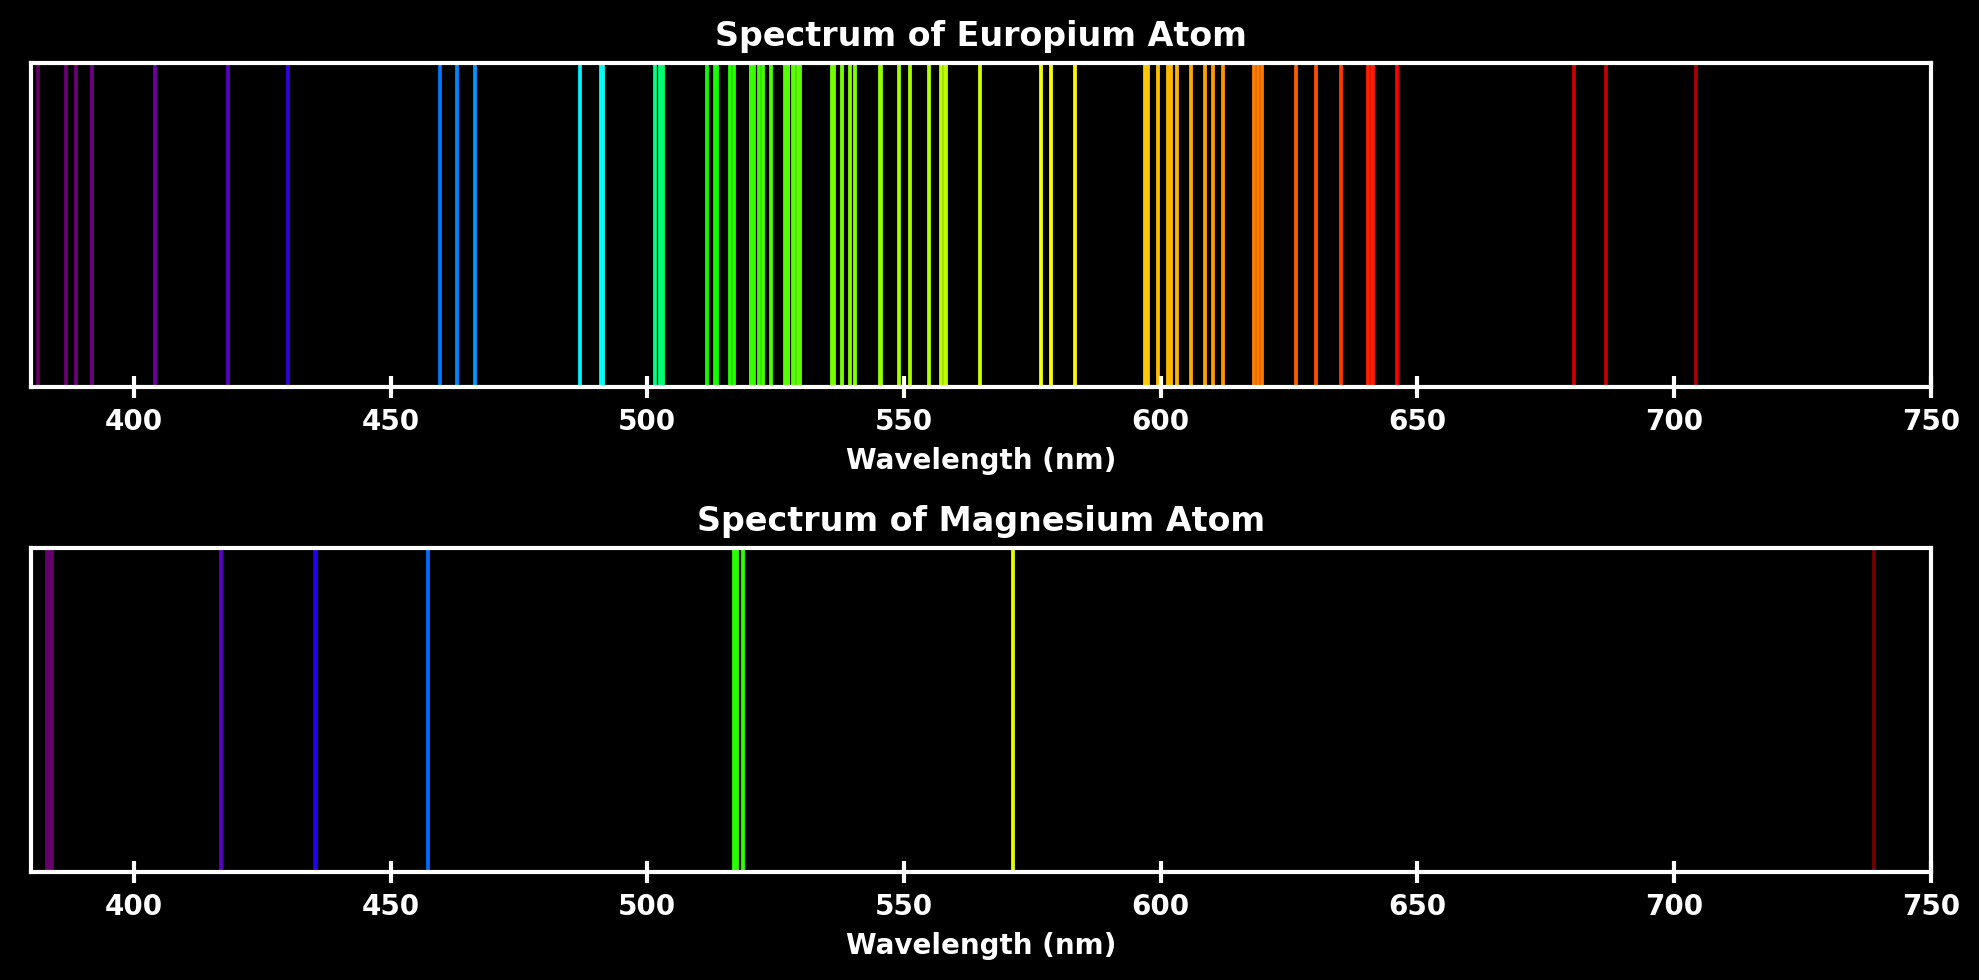

In [185]:
plt.style.use('dark_background')

hc = 6.62607004e-34 * 299792458 / 1.602176634e-19 * 1e9 # eV * nm

fig = plt.figure(figsize=(10, 5), dpi=200)

fig.add_subplot(211)
wavelengths = Europium_spectrum / 10
energies = np.arange(1.8, 3.4, 0.2)
interval = 0.2
ax = plt.gca()
s = Rectangle((380, 0), 370, 1, color='k', linewidth=None)
ax.add_patch(s)
for i in range(len(wavelengths)):
    color = np.array(wavelength_to_rgb(wavelengths[i])) / 255
    s = Rectangle((wavelengths[i], 0), interval, 1, color=color, linewidth=None)
    ax.add_patch(s)
plt.xlim(380, 750)
plt.xlabel("Wavelength (nm)", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks([])
ax.tick_params(direction='inout', length=8, width=1.5)
[x.set_linewidth(1.5) for x in ax.spines.values()]
# ax2 = ax.twiny()
# ax2.set_xlabel("Energy (eV)")
# ax2.set_xlim(380, 750)
# ax2.tick_params(direction='inout', length=5)
# ax2.set_xticks(hc/energies)
# ax2.set_xticklabels([f"{E:.1f}" for E in energies])
plt.title("Spectrum of Europium Atom", fontweight='bold')

fig.add_subplot(212)
wavelengths = Mg_spectrum / 10
energies = np.arange(1.8, 3.4, 0.2)
interval = 0.2
ax = plt.gca()
s = Rectangle((380, 0), 370, 1, color='k', linewidth=None)
ax.add_patch(s)
for i in range(len(wavelengths)):
    color = np.array(wavelength_to_rgb(wavelengths[i])) / 255
    s = Rectangle((wavelengths[i], 0), interval, 1, color=color, linewidth=None)
    ax.add_patch(s)
plt.xlim(380, 750)
plt.xlabel("Wavelength (nm)", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks([])
ax.tick_params(direction='inout', length=8, width=1.5)
[x.set_linewidth(1.5) for x in ax.spines.values()]
# ax2 = ax.twiny()
# ax2.set_xlabel("Energy (eV)")
# ax2.set_xlim(380, 750)
# ax2.tick_params(direction='inout', length=5)
# ax2.set_xticks(hc/energies)
# ax2.set_xticklabels([f"{E:.1f}" for E in energies])
plt.title("Spectrum of Magnesium Atom", fontweight='bold')

plt.subplots_adjust(bottom=0, 
                    hspace=2)

plt.tight_layout()
plt.savefig("Europium_and_Magnesium_spectrum_dark_bold.png")
plt.show()

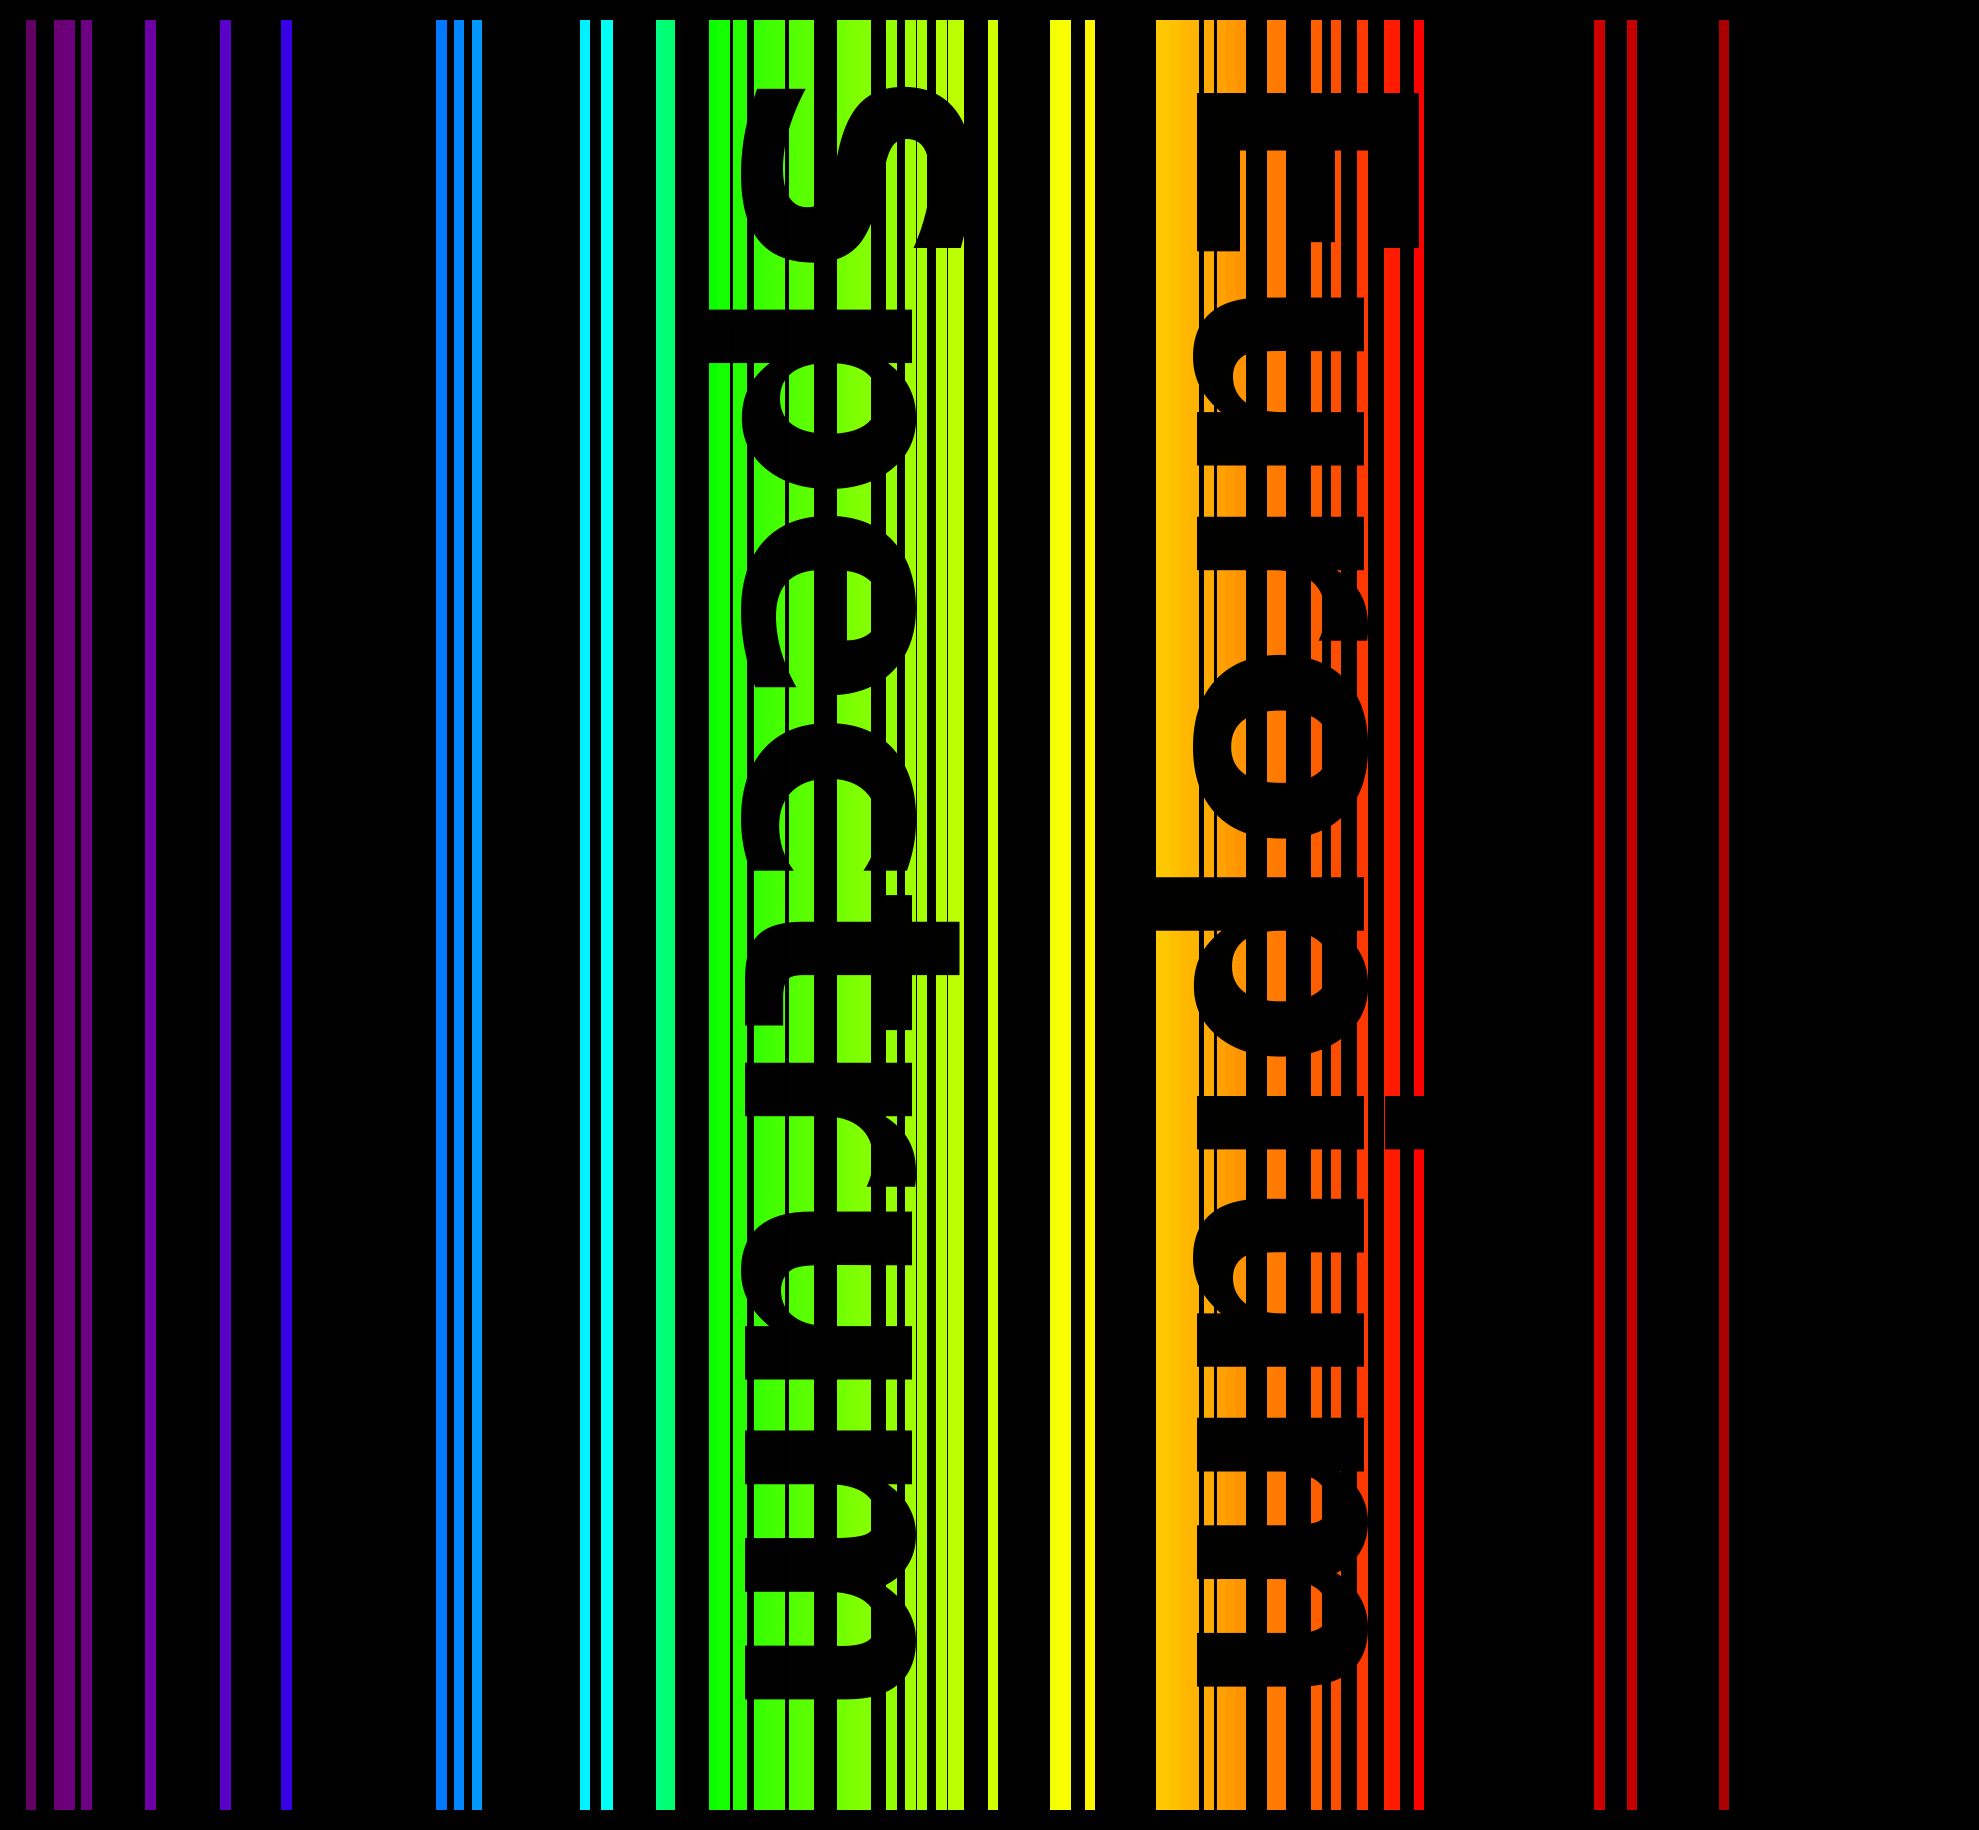

In [241]:
plt.style.use('dark_background')

hc = 6.62607004e-34 * 299792458 / 1.602176634e-19 * 1e9 # eV * nm

fig = plt.figure(figsize=(10, 10), dpi=200)

wavelengths = Europium_spectrum / 10
energies = np.arange(1.8, 3.4, 0.2)
interval = 2
ax = plt.gca()
s = Rectangle((380, 0), 370, 1, color='k', linewidth=None)
ax.add_patch(s)
for i in range(len(wavelengths)):
    color = np.array(wavelength_to_rgb(wavelengths[i])) / 255
    s = Rectangle((wavelengths[i], 0), interval, 1, color=color, linewidth=0)
    ax.add_patch(s)
    
plt.text(615, 0.5, "Europium", ha='center', va='center', color='k', fontsize=110, rotation=-90, fontweight='bold')
plt.text(530, 0.5, "Spectrum", ha='center', va='center', color='k', fontsize=110, rotation=-90, fontweight='bold')
plt.xlim(380, 750)
plt.ylim(0.1, 0.9)

plt.axis('off')
plt.tight_layout()
plt.savefig("./Europium_spectrum_artwork_text.png")
plt.show()